# <center>Введение в сверхразрешение
>**Сверхразрешение одиночного изображения (SISR, Single Image Super Resolution)** — важная задача обработки изображений, целью которой является повышение разрешения.

Не так давно в решении задач *SISR* был совершён огромный скачок — удалось добиться многообещающих результатов с помощью глубокого обучения.

В этом модуле мы сделаем обзор методов *SISR* на основе *DL* и сгруппируем их в соответствии с их целями, такими как эффективность реконструкции, точность реконструкции и точность восприятия.

1. Во-первых, мы дадим определение задаче сверхразрешения, определим предпосылки исследования и значение *SISR*.
2. Во-вторых, представим некоторые связанные с *SISR* работы, данные, методы повышения дискретизации, цели оптимизации и методы оценки качества изображения.
3. В третьих, разберём классические методы *SISR*, чтобы понять их эффективность.
4. И, наконец, мы обсудим некоторые проблемы, которые все ещё существуют в *SISR*, и обобщим некоторые новые тенденции и будущие направления развития.

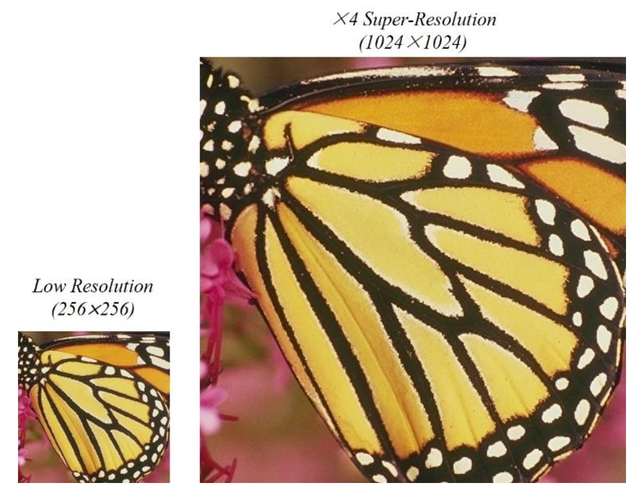

Задаче сверхразрешения изображения (*SR*) (в особенности сверхразрешения одиночного изображения (*SISR*)) уделяется всё больше внимания в академических кругах и промышленности.

Как показано на рисунке выше, задача *SISR* направлена на восстановление изображения сверхвысокого разрешения (*SR*) из его версии с низким разрешением (*LR*). Данный метод широко используется в области компьютерного зрения, включая системы безопасности и наблюдения, реконструкцию медицинских изображений, улучшение качества видео и сегментацию изображения

Многие методы *SISR* были изучены давно, например **бикубическая интерполяция** и **передискретизация**, которые основаны на интерполяции. Однако *SISR* является нетривиальной задачей, и всегда существует несколько изображений *HR*, соответствующих одному исходному изображению *LR*.

Некоторые численные методы используют априорную информацию для ограничения числа решений реконструкции, такие как методы на основе краёв и методы, основанные на статистике изображений. Между тем, есть некоторые широко используемые методы обучения, такие как **методы эмбеддингов соседей** и **методы разрежённого кодирования**, которые предполагают, что существует преобразование между патчами *LR* и *HR*.

В последнее время глубокое обучение во многих областях искусственного интеллекта продемонстрировало лучшую производительность, чем традиционные модели машинного обучения. С быстрым развитием методов *DL* были предложены многочисленные методы для *SISR*, основанные на *DL*.

Как и другие задачи преобразования изображений, задачу *SISR* можно разделить на три этапа:

* извлечение и представление признаков;
* нелинейное картирование;
* реконструкция изображения.

В традиционных численных моделях разработка алгоритма, удовлетворяющего всем этим этапам, занимает много времени и неэффективна. *DL* же может перевести задачу *SISR* в почти сквозную структуру, включающую все эти три этапа, что значительно снижает трудоёмкость и вычислительные затраты.

*SISR* сложно обучается и может привести к нестабильной и плохой сходимости результатов, в то время как *DL* может облегчить эту проблему за счёт эффективной архитектуры и правильной функции потерь.

Современные графические процессоры позволяют быстро обучать более сложные модели глубокого обучения, которые демонстрируют лучшее качество представления, чем традиционные модели.

Методы *SISR* на основе *DL* можно разделить на четыре категории:
* методы эффективности реконструкции;
* методы точности реконструкции;
* методы качества восприятия;
* методы дальнейшего улучшения.


# <center>Постановка задачи
Рассмотрим классический метод повышения разрешения изображений. В зависимости от количества входных данных его можно разделить на **сверхразрешение для одного изображения (SISR)** и **сверхразрешение для нескольких изображений (MISR)**.

*MISR* постепенно превратился в *VSR* — сверхвысокое разрешение видео.

По сравнению с *MISR/VSR*, *SISR* намного сложнее, поскольку *MISR/VSR* может опираться на дополнительную информацию, в то время как у *SISR* для реконструкции отсутствующих признаков есть информация только об одном входном изображении.

Определим изображение с низким разрешением как $I_x \in \mathbb{R}^{h \times w}$ и достоверное изображение с высоким разрешением как $I_y \in \mathbb{R}^{H \times W}$ где $H > h$ и $W > w$.

Как правило, в структуре *SISR* изображение $I_x$ *LR* моделируется как $I_x = D(I_y;\Theta_D)$ где $D$ — карта деградации $\mathbb{R}^{H \times W} \to \mathbb{R}^{h \times w}$, а $\Theta_D$ означает коэффициент деградации.

В большинстве случаев процесс деградации неизвестен, поэтому исследователи пытаются его смоделировать.  
Самый популярный режим деградации — $D(I_y;\Theta_D) = (I_y \otimes k) \downarrow_s + n$, где $(I_y \otimes k)$ представляет собой свёртку между ядром размытия $k$ и изображением *HR*.  
$I_y, \downarrow_s$  — последующая операция понижающей дискретизации с масштабным коэффициентом $s$, а $n$ — обычно аддитивный белый гауссовский шум со стандартным отклонением $\sigma$

В задаче *SISR* нам необходимо восстановить $I_{SR}$ образа *SR* из образа *LR* $I_x$.  
Поэтому задачу можно сформулировать в виде $I_{SR} = F(I_x;\Theta_F)$, где $F$ — алгоритм *SR*, а $\Theta_F$ — набор параметров процесса *SR*.

Благодаря объёмным обучающим данным и эффективным функциям потерь *SISR* превратилась в сквозную задачу обучения. Мощность представления CNN и её удобство как для прямых, так и для обратных вычислений делают возможным появление всё большего числа моделей на основе *DL*.

Таким образом, задача SISR может быть преобразована в следующую цель оптимизации:
$$ \hat{\Theta}_F = \argmin_{\Theta_F} L(I_{SR}, I_y) + \lambda \Phi (\Theta) $$

где $L$ означает функцию потерь между сгенерированным изображением *SR* $(I_{SR})$ и изображением *HR* $(I_y)$  
$\Phi (\Theta)$ означает член регуляризации, а $\lambda$ представляет собой компромиссный параметр, который используется для управления процентом члена регуляризации.

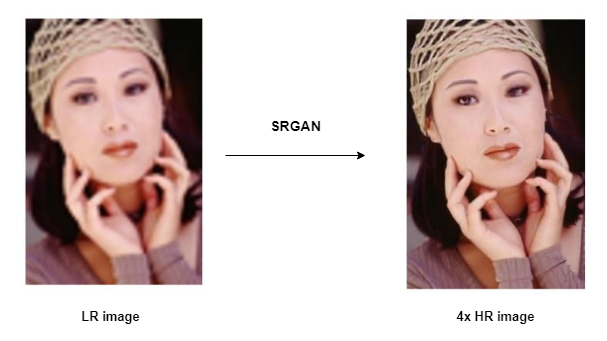

## <center>LOSS-ФУНКЦИИ

>**Потеря пикселей (Pixel Loss)** — это самый простой и популярный тип функций потерь в *SISR*, целью которого является измерение разницы между двумя изображениями на основе пикселей, чтобы эти два изображения могли сходиться как можно ближе.

В основном потеря пикселей включает потери $L_1$, среднеквадратичную ошибку (потери $MSE$) и потери Шарбонье (дифференцируемый вариант потерь $L_1$):
$$ L_1(I_{SR}, I_y) = \frac{1}{hwc}\sum_{i,j,k}|I_{SR}^{i,j,k} - I_y^{i,j,k}| $$
$$ L_{MSE}(I_{SR}, I_y) = \frac{1}{hwc}\sum_{i,j,k}(I_{SR}^{i,j,k} - I_y^{i,j,k})^2 $$
$$ L_{Char}(I_{SR}, I_y) = \frac{1}{hwc}\sum_{i,j,k}\sqrt{(I_{SR}^{i,j,k} - I_y^{i,j,k})^2 + \epsilon^2} $$

где $h$, $w$ и $c$ — высота, ширина и количество каналов изображения, $\epsilon$ — числовая константа стабильности, обычно равная $10^{-3}$.

Поскольку большинство основных показателей оценки изображений сильно коррелирует с различиями между пикселями, *Pixel Loss* по-прежнему широко используется. Однако в изображении, реконструируемом с помощью этой функции потерь, обычно отсутствуют высокочастотные детали, поэтому добиться отличного визуального эффекта затруднительно.

>**Потеря контента (Content Loss)**, также называемая **потерей восприятия**, использует предварительно обученную сеть классификации для измерения семантической разницы между изображениями и может быть дополнительно выражена как евклидово расстояние между высокоуровневыми представлениями этих двух изображений:
$$ L_{Cont}(I_{SR}, I_y, \phi) = \frac{1}{h_lw_lc_l}\sum_{i,j,k}\big(\phi^{i,j,k}_{(l)} (I_{SR}) - \phi_{(l)}^{i,j,k}(I_y)\big) $$
где $\phi$ — предварительно обученная классификационная сеть, а $\phi_{(l)}(I_{SR(y)})$ — высокоуровневое представление, извлечённое из $l$-го уровня сети, $h_l$, $w_l$, $c_l$ — высота, ширина и количество каналов объекта карты в $l$-м слое соответственно.

С помощью этого метода визуальные эффекты двух изображений могут быть максимально согласованы. *VGG* и *ResNet* являются наиболее часто используемыми классификаторами перед обучением.

**Состязательная потеря (Adversarial Loss)** была предложена и внедрена в различные задачи компьютерного зрения для того, чтобы реконструировать более реалистичные изображения *SR*.

В частности, *GAN* состоит из **генератора** и **дискриминатора**. Генератор отвечает за создание поддельных образцов, а дискриминатор используется для определения подлинности сгенерированных образцов. Например, такая дискриминационная функция потерь, основанная на кросс-энтропии, предложена в *SRGAN*:

$$ L_{\text{Adversarial}}(I_x, G, D) = \sum_{n=1}^N -\log D(G(I_x)) $$

где $G(I_x)$ — реконструированное изображение *SR*, $G$ и $D$ — генератор и дискриминатор соответственно.


## <center>АПРИОРНЫЕ ПОТЕРИ
>Помимо приведённых выше функций потерь, в модель *SISR* также можно ввести некоторые априорные знания для высококачественной реконструкции изображения, такие как **разрежённые**, **градиентные** и **краевые априорные потери**. Наиболее распространены градиентные и краевые априорные потери.

Априорные функции потерь определяются следующим образом:

$$ L_{TV}(I_{SR}) = \frac{1}{hwc}\sum_{i,j,k}\sqrt{\big( I^{i,j + l,k}_{SR} - I_y^{i,j,k} \big)^2 + \big( I^{i+l,j,k}_{SR} - I_y^{i,j,k} \big)^2} $$
$$ L_{\text{Edge}}(I_{SR}, I_y, E) = \frac{1}{hwc}\sum_{i,j,k}| E(I_{SR}^{i,j,k}) - E(I_y^{i,j,k}) | $$
где $E$ — детектор края изображения, а $E(I_{SR}^{i,j,k})$ и $E(I_y^{i,j,k})$ — края изображения, извлечённые детектором.

>**Цель априорных потерь** — оптимизировать некоторую конкретную информацию об изображении в соответствии с ожидаемой целью, чтобы модель могла сходиться быстрее, а восстановленное изображение содержало больше деталей текстуры.

# <center>Датасеты и базовые методы
>Методы, применяемые для оценки точности восстановления изображения, также называются **мерами искажения**.

Меры искажения рассчитываются при наличии искажённого изображения $\hat{x}$ и истинного эталонного изображения $x$. Искажение количественно определяется как несоответствие $\hat{x}$ и $x$ с использованием различных алгоритмов.

**PSNR (Peak Signal-to-noise Ratio)** наиболее широко используется как метод оценки в области *SISR*. Его можно легко определить с помощью средней квадратической ошибки (*MSE*) между исходным изображением $I_y \in \mathbb{R}^{H \times W}$ и реконструированным изображением $I_{SR} \in \mathbb{R}^{H \times W}$:
$$ MSE = \frac{1}{HW}\sum_{i=0}^{H-1}\sum_{j=0}^{W-1}\big(I_y(i,j) - I_{SR}(i,j) \big)^2 $$
$$ PSNR = 10 \times \log_{10}(\frac{MAX^2}{MSE}) $$
где $MAX$ — максимально возможный пиксель изображения.

Поскольку *PSNR* тесно связан с *MSE*, ожидается, что модель, обученная с потерями *MSE*, будет иметь высокие оценки *PSNR*.

Хотя более высокий *PSNR* обычно указывает на более высокое качество построения, он просто учитывает *MSE* для каждого пикселя, из-за чего он не может зафиксировать различия в восприятии.

>**Измерение индекса структурного сходства (SSIM, Structural Similarity Index Measure)** — ещё один популярный метод оценки, который измеряет сходство между двумя изображениями на основе восприятия, включая структуру, яркость и контрастность.

В отличие от *PSNR*, который вычисляет абсолютные ошибки на уровне пикселей, *SSIM* предполагает наличие сильной взаимозависимости между пикселями, которые находятся близко друг к другу в пространстве. Эти зависимости несут важную информацию, относящуюся к воспринимаемым структурам.

Таким образом, *SSIM* может быть выражен как взвешенная комбинация трёх сравнительных показателей ($l$ — яркость, $c$ — контраст, и $s$ — структура) между $I_{SR}$ (реконструированное изображение) и $I_y$ (исходное изображение):

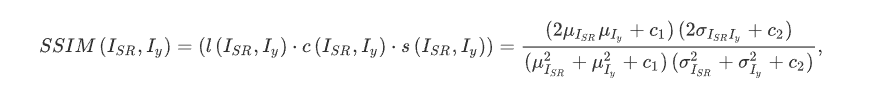

где $\mu_{I_{SR}}, \mu_{I_y}, \sigma_{I_{SR}}, \sigma_{I_{SR}I_y}$ являются средним/дисперсией/ковариацией соответствующих элементов.

Более высокий *SSIM* указывает на более высокое сходство между двумя изображениями.

*SSIM* широко используется из-за его удобства и стабильной работы при оценке качества восприятия.

Кроме того, существуют также некоторые варианты *SSIM*, такие как *Multi-Scale SSIM*, который проводится в нескольких масштабах в процессе многоэтапной подвыборки.

Зрительная система человека сложна и способна различать многие аспекты при сравнении двух изображений (текстуры и края внутри изображений). Методы, направленные на нахождение различий при абсолютном сходстве (*PSNR/SSIM*), не всегда работают хорошо.

Хотя меры искажений широко используются, повышение точности реконструкции не всегда сопровождается улучшением визуального качества. Фактически исследователи показали, что **искажение и качество восприятия в некоторых случаях противоречат друг другу**. Воспринимаемое качество изображения $\hat{x}$ определяется как степень, в которой оно похоже на естественное изображение, что не имеет ничего общего с его сходством с каким-либо эталонным изображением.

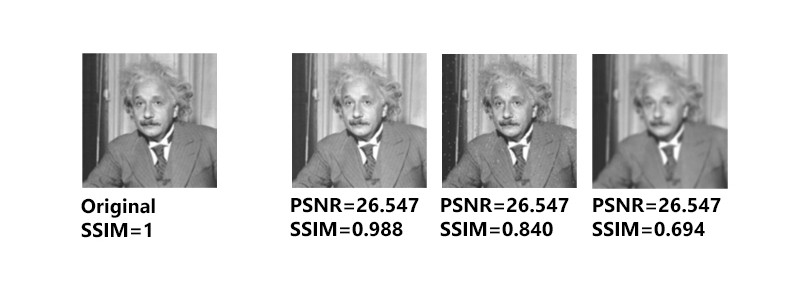

>Ещё одна оценка, **MOS (Mean Opinion Score)**, — это субъективный метод, который позволяет напрямую оценить качество восприятия.

У каждого зрителя есть и исходное, и тестовое изображение. После того как все зрители завершат оценку, результаты сопоставляются с числовыми значениями, а средние баллы становятся окончательным *MOS*. *MOS* — это трудоёмкий и дорогой метод, поскольку он требует работы руками. Нестабильность *MOS* также вызывает сомнения, поскольку различия *MOS* могут быть незаметны для пользователей. Более того, этот метод слишком субъективен, чтобы гарантировать справедливость. Данный метод используются и в других генеративных задачах (голос, текст).

Хотя проектирование более глубоких сетей — это самый простой способ получить лучшую производительность реконструкции, нельзя игнорировать тот факт, что эти модели также будут иметь больше параметров, дольше выполняться и подразумевать большие вычислительные затраты.

Чтобы расширить практическое применение *SISR*, нам необходимо рассмотреть компромисс между производительностью модели и её сложностью. Поэтому важно оценивать эффективность реконструкции по следующим основным параметрам:

1. **Размер модели**. Обычно он связан с памятью, которым располагает устройство. Модель, содержащую больше параметров, сложнее запустить на устройстве с ограниченными возможностями аппаратного обеспечения. Поэтому построение облегчённых моделей способствует продвижению и применению алгоритма. Среди всех показателей количество параметров модели является наиболее интуитивно понятным для измерения размера модели.
2. **Время выполнения**. Обычно от модели требуется быстрое время выполнения, чтобы обработать больше картинок за раз. Но появление сложных примеров, таких как механизм внимания, нарушает этот баланс. Когда в модель вводятся какие-то сложные операции, облегчённой сети также может потребоваться больше времени на работу. Поэтому критически важно оценить время выполнения модели на различных устройствах.
3. **Mult-Adds**. Количество операций умножения-сложения, или *Mult-Adds*, всегда используются для измерения вычислений модели, поскольку операции в модели CNN в основном представляют собой умножение и сложение. Значение *Mult-Adds* связано со скоростью или временем, необходимым для запуска модели.

Таким образом, при оценке модели стоит учитывать **эффективность инференса** модели.

## НАБОРЫ ОБУЧАЮЩИХ И ТЕСТОВЫХ ДАННЫХ
Данные важны для моделей (особенно для моделей *SISR* на основе *DL*) для достижения хорошей производительности реконструкции.

В настоящее время в промышленности и академической среде существует несколько доступных наборов данных для *SISR*, включая **BSDS300**, **DIV2K** и **Flickr2K**.

Также существует множество тестовых наборов данных, которые можно использовать для эффективного тестирования производительности моделей, таких как **Set5**, **Set14**, **Urban100** и **Manga109**.

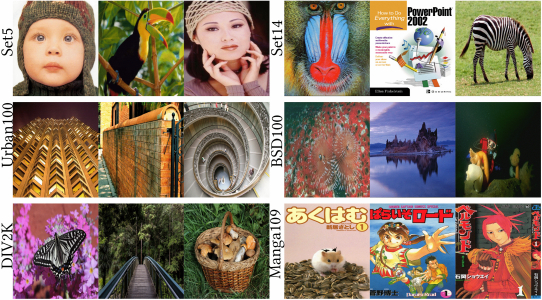

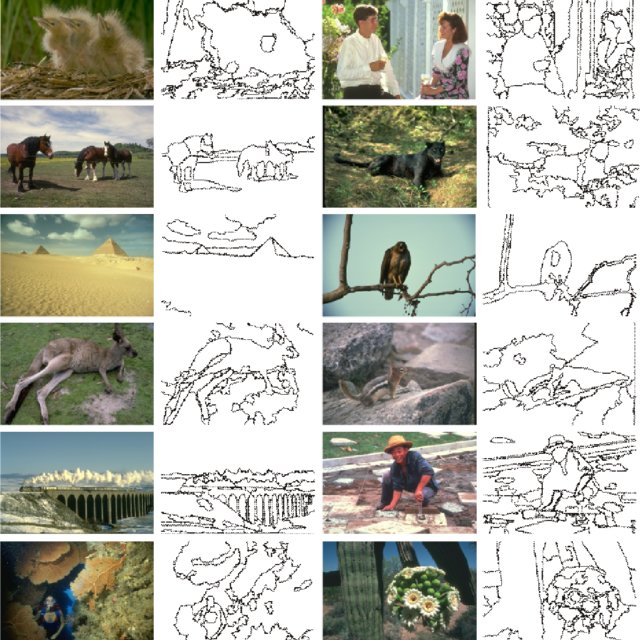

>**DIV2K** является наиболее широко используемым датасетом для обучения моделей. Он представляет собой высококачественный набор данных, содержащий 800 обучающих изображений, 100 проверочных изображений и 100 тестовых изображений.

>**Flickr2k** — это большой расширенный набор данных, который содержит 2 650 изображений в 2K с Flickr.

>**RealSR** — это первый набор данных именно для SISR с парными изображениями LR и HR.

В дополнение к перечисленным наборам данных некоторые наборы данных, широко используемые в других задачах компьютерного зрения, также используются в качестве дополнительных обучающих датасетов для *SISR*. К таким датасетам относятся *ImageNet* и *CelebA*.

Кроме того, широко используется объединение нескольких датасетов (например, *DF2K*) для обучения с целью дальнейшего повышения производительности модели.

>**Цель SISR** состоит в том, чтобы увеличить изображение меньшего размера и сохранить его точность.

Следовательно, операция увеличения, также называемая **повышающей дискретизацией**, является важным шагом в *SISR*.

Существующие механизмы повышения дискретизации можно разделить на четыре типа: 
* *SR* до повышения дискретизации,
* *SR* после повышения дискретизации, 
* *SR* с прогрессивным повышением дискретизации,
* итеративное *SR* с дискретизацией вверх и вниз. 

В этом юните мы поговорим о нескольких методах повышения частоты дискретизации с помощью **интерполяции**.

Интерполяция является наиболее широко используемым методом повышения дискретизации. Основные актуальные методы интерполяции включают **интерполяцию методом ближайшего соседа**, **билинейную интерполяцию** и **бикубическую интерполяцию**. Будучи легко интерпретируемыми и простыми в реализации, эти методы до сих пор широко используются.

>**Интерполяция методом ближайшего соседа** — простой и интуитивно понятный алгоритм, который выбирает ближайшее значение пикселя для каждой интерполируемой позиции. Он быстро выполняется, но с трудом обеспечивает получение высококачественных результатов.

>**Билинейная интерполяция** последовательно выполняет операции линейной интерполяции по двум осям изображения. Этот метод может дать лучшие результаты, чем интерполяция методом ближайшего соседа, сохраняя при этом относительно высокую скорость.

>**Бикубическая интерполяция** выполняет кубическую интерполяцию по каждой из двух осей. По сравнению с билинейной, результаты бикубической интерполяции более гладкие с меньшим количеством артефактов, но работает она медленнее, чем другие методы интерполяции.

Интерполяция также является основным методом построения датасетов с парными изображениями для *SISR* и широко используется при предварительной обработке данных моделей *SISR* на основе *CNN*.

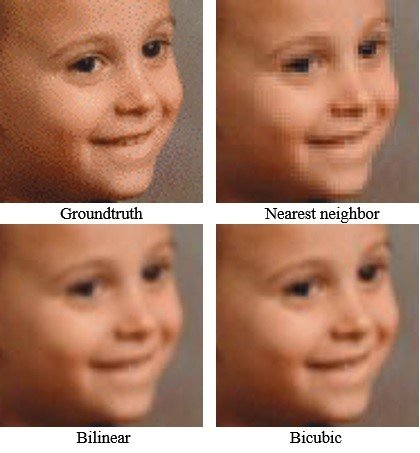



# <center>Super Resolution для специфичных задач
>**Сверхразрешение изображения лица** — самая известная область, в которой применяется технология *SR*. Из-за потенциала применения в системах распознавания лиц, таких как системы безопасности и видеонаблюдения, сверхразрешение изображения лица стало популярной областью исследований.

В последнее время удалось достичь значительного прогресса в развитии методов на основе *DL* в сверхвысоком разрешении изображений лиц. Некоторые исследователи предлагают использовать *CPGAN* для решения проблем артефактов на лице и компенсации освещённости.

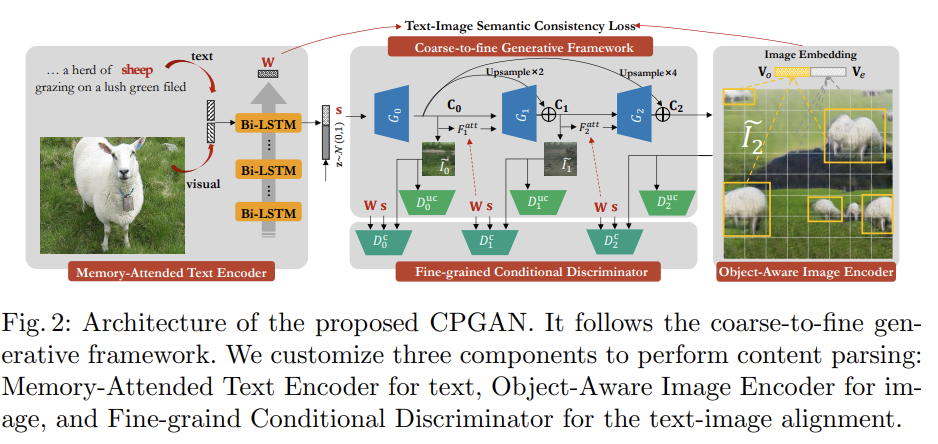

В более современной работе окклюзия маски рассматривается как шум изображения, и для задачи сверхразрешения лица в маске создаётся совместная обучающая сеть (*JDSR-GAN*).

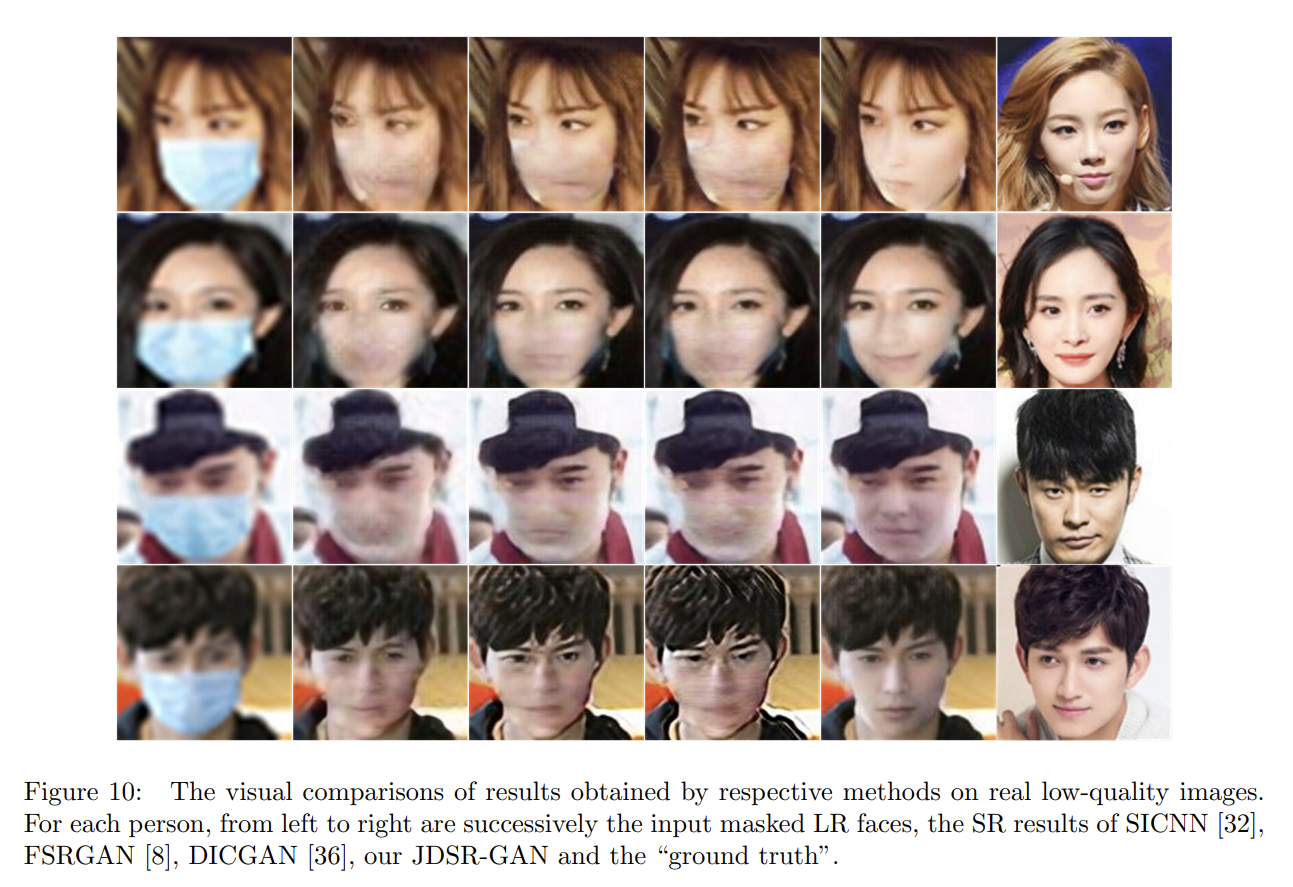

Самое популярное в последнее время направление увеличения разрешения изображения — игры. Зачем рендерить каждый пиксель, если мы можем просто превратить низкое разрешение в более высокое? Эта операция оказалась значительно быстрее расчётов теней для большего разрешения. Ниже представлен пример от *AMD*:

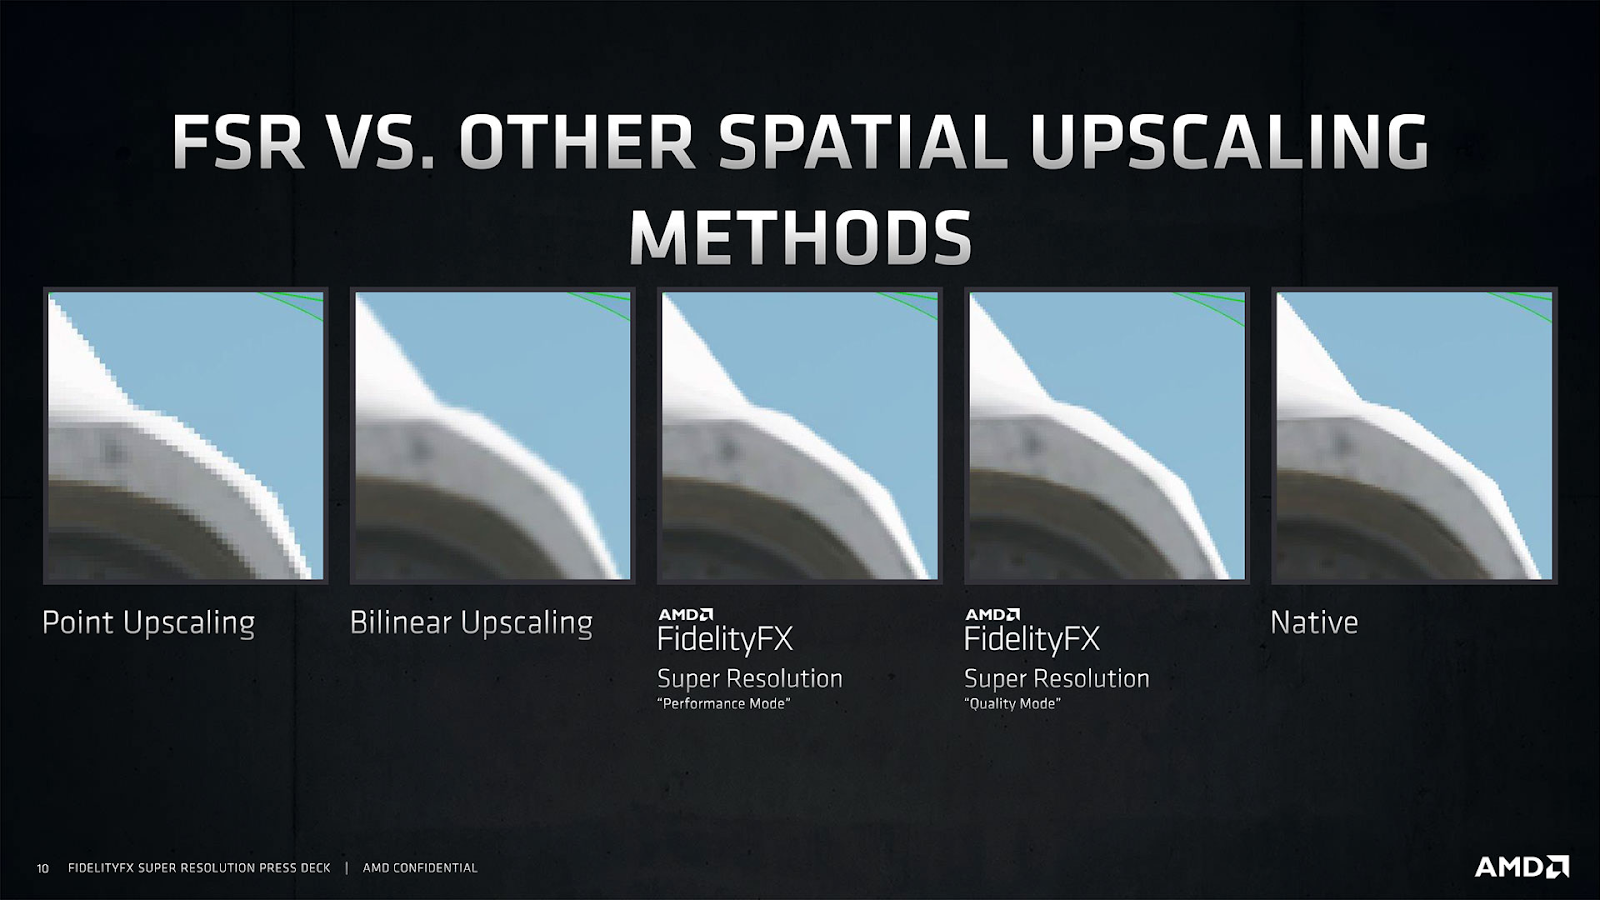

Подобное решение есть и у *NVIDIA* — *DLSS*. Однако создатели не раскрывают подробности устройства своей сети — просто намекают на использования технологий, которые мы разобрали в предыдущей части модуля.

Также стоит отметить, что задача сверхразрешения в играх также называется **Video Super Resolution**. В исследованиях говорится, что необходимо каким-то образом передавать информацию между кадрами. Для этого могут использоваться рекуррентные слои. Также мы можем использовать интерполяцию ближайшими соседями для сглаживания и добавлять быстрый денойзинг между кадрами для сохранения контекста объектов.

Вероятно, одна из наиболее интересных сфер применения сверхразрешения — **медицина**. Применение сверхразрешения (*SR*) в медицине направлено на удовлетворение потребности в получении высококачественных изображений, в то время как исходные изображения получены с ограниченным рентгеновским облучением (компьютерная томография с низкой дозой (*КТ*), низкопольная магнитно-резонансная томография (*МРТ*)). Однако из-за своей сложности и более высоких требований к медицинским изображениям *SR* по-прежнему остаётся сложной задачей в медицинской визуализации.

